# Time series analysis in Python

In [27]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

R squared

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

In [28]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

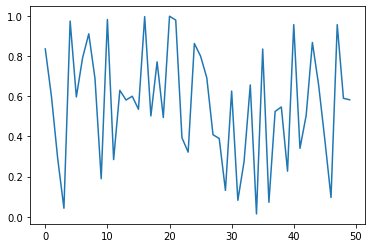

In [29]:
# Create a mock series
rng = np.random.default_rng(seed=100)
series = rng.uniform(0, 1, 50)  # random walk with uniform dist. in [0, 1]
plt.plot(series)  # plot series

In [30]:
def moving_average(series, n):
    """Calculate average of n observations
    """
    return np.average(series[-n:])

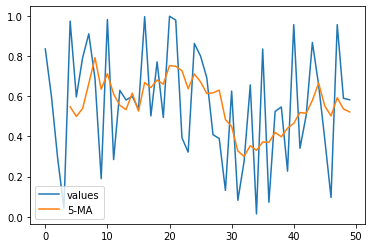

In [31]:
series = pd.Series(series)  # convert to pandas Series

plt.plot(series, label="values")
plt.plot(series.rolling(5).mean(), label="5-MA")
plt.legend()

In [32]:
# weighted average
def weighted_average(series, weights):
    """Calculates the weighted average array for the time series.

    Args:
        series (numpy array): values of time series
        weights (numpy array): values of the weights
    """
    n = len(weights)
    weightedAverage = np.dot(series[-n:], weights)
    
    return weightedAverage

In [36]:
wa = weighted_average(series, weights=np.linspace(0, 1, 50)/np.linspace(0, 1, 50).sum())  # weights are normalized
wa

0.5354343231274212

## Exponential Smoothing

$\hat{y}_{t} = \alpha \cdot y_t + (1-\alpha) \cdot \hat y_{t-1}$

In [33]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

## Double Exponential Smoothing

$\ell_x = \alpha y_x + (1-\alpha)(\ell_{x-1} + b_{x-1})$

$b_x = \beta(\ell_x - \ell_{x-1}) + (1-\beta)b_{x-1}$

$\hat{y}_{x+1} = \ell_x + b_x$